In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data_=data.reset_index()['Close']

In [5]:
data_

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

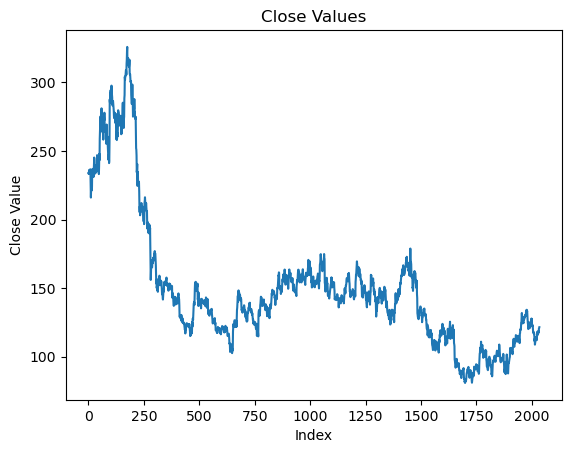

In [6]:
import matplotlib.pyplot as plt

plt.plot(data_)

plt.xlabel('Index')
plt.ylabel('Close Value')
plt.title('Close Values')

plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_=scaler.fit_transform(np.array(data_).reshape(-1,1))

In [8]:
data_

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [9]:
data_.shape

(2035, 1)

In [10]:
train_data, test_data=data_[0:int(len(data_)*0.65), :], data_[int(len(data_)*0.65):len(data_),:1]

In [11]:
train_data.shape

(1322, 1)

In [12]:
test_data.shape

(713, 1)

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)
    
time_step=100
X_train, y_train=create_dataset(train_data, time_step)
X_test, y_test=create_dataset(test_data, time_step)

In [14]:
X_train.shape

(1221, 100)

In [15]:
X_test.shape

(612, 100)

In [16]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [18]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
39/39 [==============================] - 11s 130ms/step - loss: 0.0135
Epoch 2/10
39/39 [==============================] - 5s 131ms/step - loss: 0.0018
Epoch 3/10
39/39 [==============================] - 5s 131ms/step - loss: 0.0016
Epoch 4/10
39/39 [==============================] - 5s 136ms/step - loss: 0.0014
Epoch 5/10
39/39 [==============================] - 5s 130ms/step - loss: 0.0013
Epoch 6/10
39/39 [==============================] - 5s 129ms/step - loss: 0.0013
Epoch 7/10
39/39 [==============================] - 5s 131ms/step - loss: 0.0011
Epoch 8/10
39/39 [==============================] - 5s 132ms/step - loss: 0.0013
Epoch 9/10
39/39 [==============================] - 5s 130ms/step - loss: 0.0011
Epoch 10/10
39/39 [==============================] - 5s 138ms/step - loss: 0.0010


In [20]:
train_loss=model.evaluate(X_train, y_train, verbose=0)
test_loss=model.evaluate(X_test, y_test, verbose=0)

print('Training Loss: ', train_loss)
print('Test Loss: ', test_loss)

Training Loss:  0.0008141885627992451
Test Loss:  0.0006725878920406103


In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 42ms/step


In [22]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

165.84585521657672

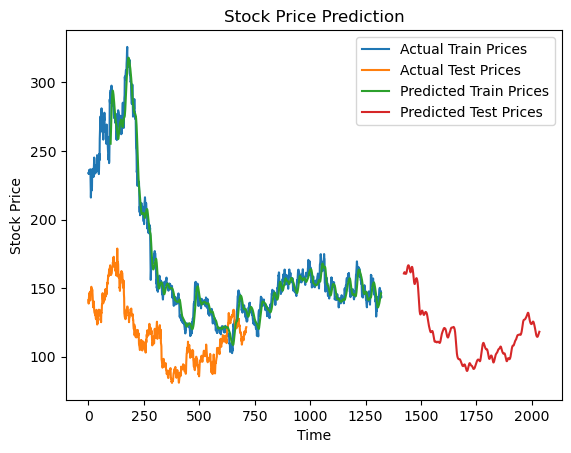

In [23]:
sequence_length=time_step

train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)
plt.plot(train_data, label='Actual Train Prices')
plt.plot(test_data, label='Actual Test Prices')
plt.plot(range(sequence_length, sequence_length + len(train_predict)), train_predict, label='Predicted Train Prices')
plt.plot(range(sequence_length + len(train_data)+1, len(data_)), test_predict, label='Predicted Test Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()